# AR model

In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [34]:
df.index.freq='MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


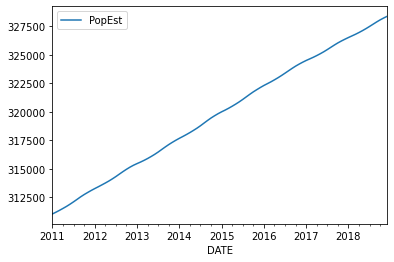

In [6]:
df.plot()

In [7]:
len(df)

96

In [35]:
train=df.iloc[:84]
test=df.iloc[84:]

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from statsmodels.tsa.ar_model import AR,ARResults

In [36]:
model=AR(train['PopEst'])
AR1fi1=model.fit(maxlag=1)

In [38]:
AR1fi1.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [39]:
start=len(train)

In [40]:
end=len(df)-1

In [41]:
pred1=AR1fi1.predict(start,end)
pred1=pred1.rename('AR(1) Predictions')
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

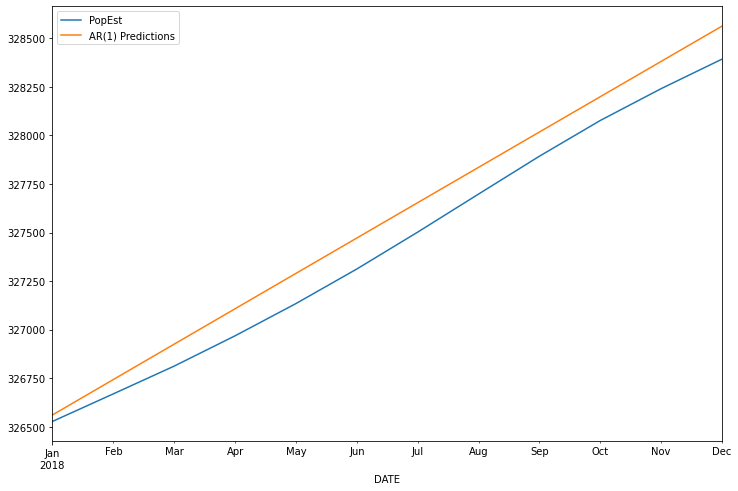

In [48]:
test.plot(figsize=(12,8))
pred1.plot(legend=True);

In [50]:
model=AR(train['PopEst'])
AR2fi1=model.fit(maxlag=2)

In [51]:
pred2=AR2fi1.predict(start,end)
pred2=pred2.rename('AR2 Predictons')

In [44]:
#for optimum number of Lags
model=AR(train['PopEst'])
ARfit=model.fit(ic='t-stat')

In [45]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [52]:
pred8=ARfit.predict(start,end)
pred8=pred8.rename('AR8 Predictons')

In [46]:
from sklearn.metrics import mean_squared_error

In [53]:
label=['AR1','AR2','AR8']
predictions=[pred1,pred2,pred8]

In [57]:
#errors
for i in range(3):
    error=mean_squared_error(test,predictions[i])
    print(f"labels{i} MSE= {error}")

labels0 MSE= 17449.71423587912
labels1 MSE= 2713.258667805521
labels2 MSE= 186.9783771797175


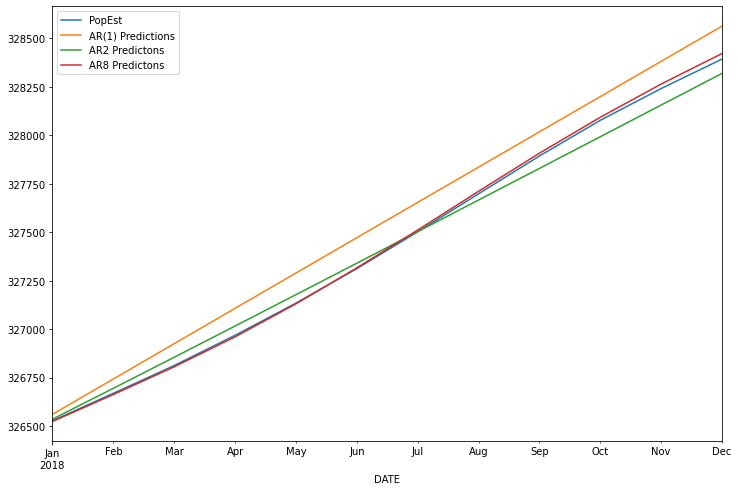

In [58]:
test.plot(figsize=(12,8))
pred1.plot(legend=True)
pred2.plot(legend=True)
pred8.plot(legend=True);

In [63]:
#future forecasting
model=AR(df['PopEst'])
ARfit=model.fit()
forecasted_value=ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

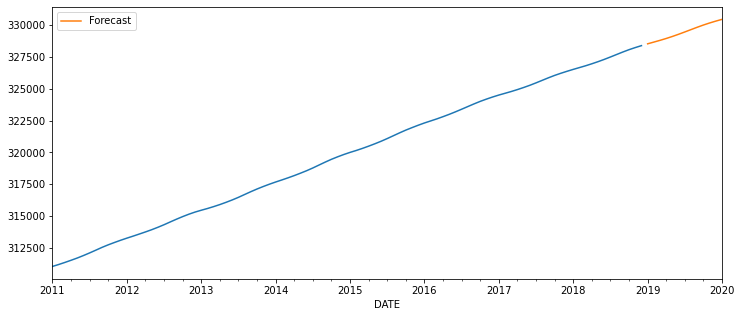

In [65]:
#plotting forecasted value
df['PopEst'].plot(figsize=(12,5))
forecasted_value.plot(legend=True);

# Choosing the best p,d,q

In [66]:
df1=pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
df2=pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [68]:
from pmdarima import auto_arima

In [85]:
import warnings
warnings.filterwarnings('ignore')
#help(auto_arima)

In [86]:
stepwise_fit=auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,stationary=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2494.782, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2479.081, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2482.539, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2476.368, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2477.027, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2474.884, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2471.690, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2471.960, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2479.132, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2475.579, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.963 seconds


In [87]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1231.845
Date:                Tue, 25 Aug 2020   AIC                           2471.690
Time:                        19:19:52   BIC                           2487.290
Sample:                             0   HQIC                          2477.889
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.2945      4.946      1.879      0.060      -0.399      18.988
ar.L1          0.7787      0.118      6.605      0.000       0.548       1.010
ma.L1         -0.6233      0.151     -4.142      0.000      -0.918      -0.328
sigma2        50.4397      3.646     13.836      0.000      43.294      57.585
===================================================================================
Ljung-Box (Q):                       54.05   Jarque-Bera (JB):                18.66
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.48
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
#checking for Non-Stationary Data
stepwise_fit=auto_arima(df1['Thousands of Passengers'],
                        start_p=0,
                        start_q=0,
                        max_p=4,
                        max_q=4,
                        seasonal=True,
                        stationary=False,
                        trace=True,
                        m=12
                       )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.72 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [89]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 25 Aug 2020   AIC                           1019.178
Time:                                     19:21:22   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA

In [90]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

In [92]:
df1=pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq='D'
df1=df1[:120]  #stationary data

In [93]:
df2=pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

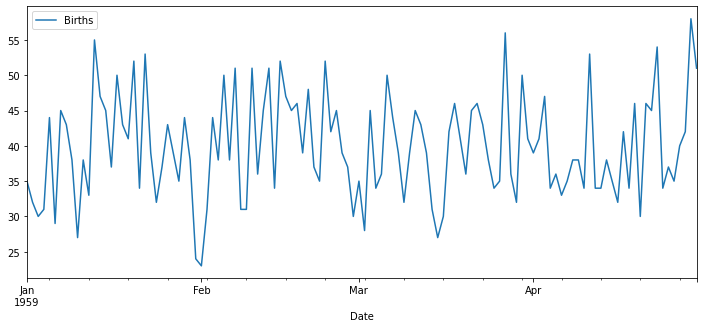

In [96]:
df1.plot(figsize=(12,5))

In [99]:
from statsmodels.tsa.stattools import adfuller
def adf_test(time_series):
    """
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
    root, with the alternative that there is no unit root. If the pvalue is
    above a critical size, then we cannot reject that there is a unit root.
    """
    test=adfuller(time_series)
    out=pd.Series(test[:4],index=['adf test statistics','p-value','used_lag','n_obs'])
    for k,v in test[4].items():
        out[f"Critical_value_{k}"]=v
    
    if out[1]<0.05:
        print('Stationary data')
    else:
        print('Non-Stationary data')
    return out

In [100]:
adf_test(df1)

Stationary data


adf test statistics   -9.855384e+00
p-value                4.373545e-17
used_lag               0.000000e+00
n_obs                  1.190000e+02
Critical_value_1%     -3.486535e+00
Critical_value_5%     -2.886151e+00
Critical_value_10%    -2.579896e+00
dtype: float64

In [141]:
auto_arima(df1['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,stationary=True,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.41 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.670 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 25 Aug 2020   AIC                            823.489
Time:                        21:39:09   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
#train test split
train=df1.iloc[:90]
test=df1.iloc[90:]

In [142]:
model=ARMA(train['Births'],order=(2,2)) #ARMA (0,0) is giving error
results=model.fit()

In [143]:
 results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 25 Aug 2020   AIC                            627.809
Time:                        21:39:45   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [144]:
start=len(train)
end=len(train)+len(test)-1

In [147]:
predictions=results.predict(start,end).rename('ARMA(2,2) Predictions')

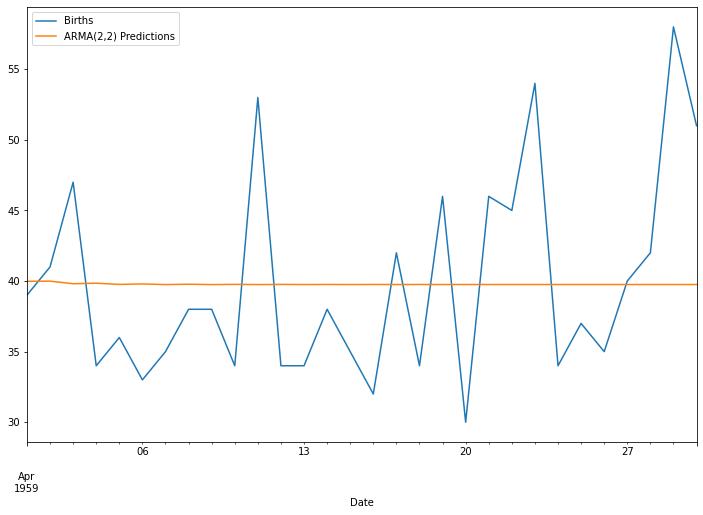

In [150]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True);

Model not able to predict the noise much... It predicted close to the mean of the test data

In [151]:
test.mean(),predictions.mean()

(Births    39.833333
 dtype: float64,
 39.77743596633806)

# ARIMA

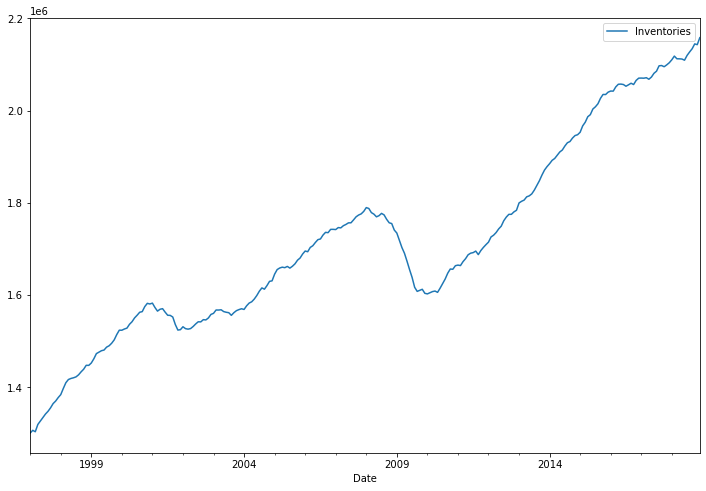

In [154]:
df2.plot(figsize=(12,8));

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose

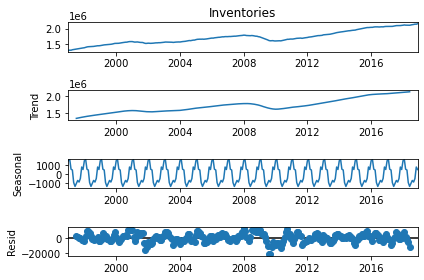

In [159]:
seasonal_decompose(df2['Inventories'],model='additive').plot();

In [160]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 25 Aug 2020   AIC                           5348.037
Time:                        21:49:45   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
adf_test(df2)

Non-Stationary data


adf test statistics     -0.087684
p-value                  0.950652
used_lag                 5.000000
n_obs                  258.000000
Critical_value_1%       -3.455953
Critical_value_5%       -2.872809
Critical_value_10%      -2.572775
dtype: float64

In [178]:
from statsmodels.tsa.statespace.tools import diff
df2['Diff_1']=diff(df2['Inventories'],k_diff=1)
adf_test(df2['Diff_1'][1:])

Stationary data


adf test statistics     -3.412249
p-value                  0.010548
used_lag                 4.000000
n_obs                  258.000000
Critical_value_1%       -3.455953
Critical_value_5%       -2.872809
Critical_value_10%      -2.572775
dtype: float64

In [174]:
# Or can use another method
from pmdarima import utils
diff=utils.diff(df2['Inventories'],differences=1)
diff=np.insert(diff,0,np.nan)
df2['Diff_1']=diff
adf_test(df2['Diff_1'][1:])

Stationary data


adf test statistics     -3.412249
p-value                  0.010548
used_lag                 4.000000
n_obs                  258.000000
Critical_value_1%       -3.455953
Critical_value_5%       -2.872809
Critical_value_10%      -2.572775
dtype: float64

So, differencing 1 gives us stationary data

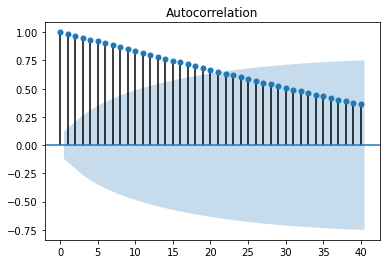

In [180]:
plot_acf(df2['Inventories'],lags=40);

ACF decays slowly.. MA=0

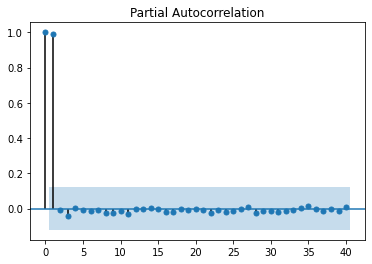

In [181]:
plot_pacf(df2['Inventories'],lags=40);

Sharp cutoff after lag 1... so AR (1)

In [183]:
stepwise_fit=auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.390 seconds


In [184]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 25 Aug 2020   AIC                           5348.037
Time:                        22:41:20   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
len(df2)

264

In [186]:
train=df2.iloc[:252]
test=df2.iloc[252:]

In [190]:
model=ARIMA(df2['Inventories'],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.267
Date:                Tue, 25 Aug 2020   AIC                           5228.506
Time:                        22:50:55   BIC                           5242.794
Sample:                    02-01-1997   HQIC                          5234.248
                         - 12-01-2018                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3440.8584   1312.000      2.623      0.009     869.386    6012.330
ar.L1.D.Inventories     0.9037      0.039     23.412      0.000       0.828       0.979
ma.L1.D.Inventories    -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [191]:
start=len(train)
end=len(train)+len(test)-1

In [193]:
predictions=results.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1) Predictions')

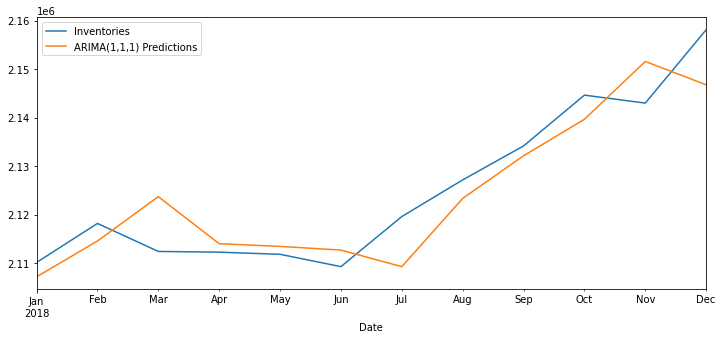

In [196]:
test['Inventories'].plot(figsize=(12,5),legend=True)
predictions.plot(legend=True);

In [197]:
from statsmodels.tools.eval_measures import rmse

In [198]:
error=rmse(test['Inventories'],predictions)
error

6577.7961141610685

In [199]:
test['Inventories'].mean()

2125075.6666666665

In [200]:
#Forecast into unknown future

In [206]:
model=ARIMA(df2['Inventories'],order=(1,1,1))
results=model.fit()
forecast=results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

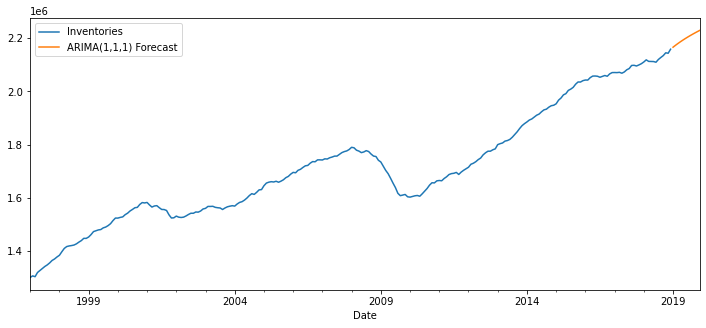

In [207]:
df2['Inventories'].plot(figsize=(12,5),legend=True)
forecast.plot(legend=True);

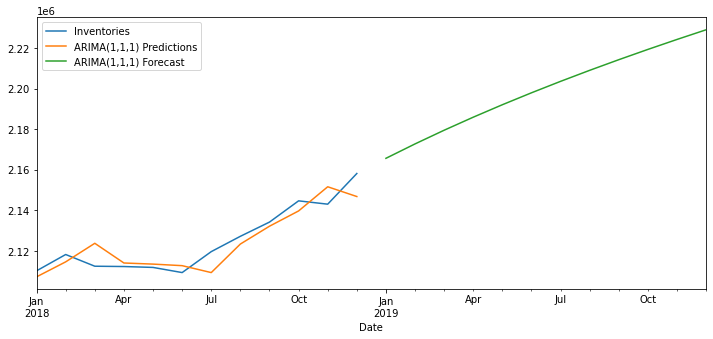

In [208]:
test['Inventories'].plot(figsize=(12,5),legend=True)
predictions.plot(legend=True)
forecast.plot(legend=True);